A decision tree is a learning algorithm that can be used on both Classification and Regression tasks.

In [121]:
from sklearn.tree import plot_tree, export_graphviz
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris, make_moons
from sklearn.model_selection import (train_test_split, cross_val_score
                                     ,GridSearchCV, ShuffleSplit)
from sklearn.metrics import accuracy_score

In [63]:
iris = load_iris()
X = iris['data'][:, 2:]
y = iris['target'].astype(float)

clf = DecisionTreeClassifier().fit(X, y)
clf.score(X, y)

0.9933333333333333

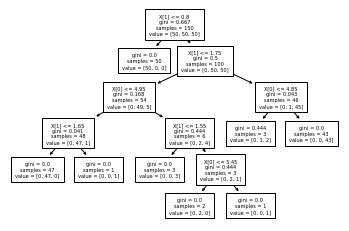

In [64]:
plot_tree(clf, fontsize=5);

The probability estimate of a class can also be gotten, using the `predict_proba` function

In [65]:
clf.predict_proba([[5., 1.5]])

array([[0., 0., 1.]])

In [66]:
clf.predict([[5., 1.5]])

array([2.])

# Exercises

In [70]:
X, y = make_moons(n_samples=10000, noise=0.4)
X.shape, y.shape

((10000, 2), (10000,))

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=7,
                                                    test_size=0.2)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 2), (2000, 2), (8000,), (2000,))

### Using GridSearchCv

In [125]:
grid_param = {
    'max_depth':[10, 50, 100, None],
    'min_samples_split': [3, 10 , 15, 25],
    'max_features':['log', 'sqrt', 0.6, 1],
    'max_leaf_nodes':[3, 10, 25, 50, 100]
}

grid_clf = GridSearchCV(clf, param_grid=grid_param, scoring='accuracy'
                        , n_jobs=-1, cv=3)
grid_clf.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'max_depth': [10, 50, 100, None],
                     

In [126]:
grid_clf.best_params_

{'max_depth': 10,
 'max_features': 1,
 'max_leaf_nodes': 25,
 'min_samples_split': 15}

In [127]:
model = grid_clf.best_estimator_
model.fit(X_train, y_train)
model.score(X_train, y_train) # on the training set

0.863

In [128]:
model.score(X_test, y_test)

0.857

In [129]:
y_preds = model.predict(X_test)
accuracy_score(y_test, y_preds)

0.857

### Using Cross validation 

In [108]:
cross_val_score(model, X, y, cv=10, n_jobs=-1)

array([0.841, 0.834, 0.861, 0.864, 0.862, 0.864, 0.855, 0.822, 0.859,
       0.872])

In [109]:
# mean score 
cross_val_score(model, X, y, cv=10, n_jobs=-1).mean()

0.8507